# Recombination & Eye Color
### by Joyce Zheng

In [146]:
from datascience import *
import numpy as np
import random
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
#from client.api.notebook import Notebook

### Purpose
Study how having great-grandparents of Asian and European descent affect the great-grandchild's eye color.


### General Information on the Determination of Eye Color
- Green alleles are **dominant** over blue alleles, and brown alleles are **dominant** over both blue and green alleles
- If you received a blue allele and a brown allele, your eye color would be **brown** because brown is the dominant allele
- If you have blue eyes, that means you received blue alleles from **both** parents


### General Approach
- Identify **3** genes/locations of the genome that contribute to the determination of eye color
- Run two simulations with great-grandparents that have different location values. For each simulation:
    - Recombine the genes to obtain alleles for the child
    - Analyze the eye color of the offspring


### Defining Genotype to Phenotype Mapping
We can observe 11, 12, 21, or 22 at a given location. **1 is dominant (brown)**, so an 11, 12, or 21 would all result in offspring with brown eyes.

**For example**, if grandparent 1 had 3 location values of 22, 22, 22 and grandparent 8 had 3 location values of 11, 11, 21, after recombination, we could get for this specific pairing of grandparents values of 21 and 22.

The offspring's eye color is determined by the dominant color at the locations. **Going off the example above**, suppose the offspring had locations of 21, 21, and 22 after recombination. This means that at location 1, the first allele would have a dominating number of 2's and the second allele would have a dominating number of 1's. Locations 1 and 2 would thus signify brown eyes while location 3 would signify blue eyes. Since 2/3 of the locations are brown eyes, the offspring would have **brown eyes**.


### Grandparents

<img src='image1.png' width=400>

### Functions

In [147]:
# Write a function that models the recombination of two chromosomes. 

seq1 = 'A'*1000
seq2 = 'B'*1000

def recombine(seq1, seq2, r = 8):
    l1 = len(seq1)
    l2 = len(seq2)
    if l1 == l2:
        n_sites = np.random.poisson(lam = r*l1/1000) + 1
        sites = random.sample(list(np.arange(1, l1-1)), n_sites)
        sites = np.r_[0, np.sort(sites), l1-1]
        l_s = len(sites)
        out1 = ''
        out2 = ''
        for i in np.arange(0, l_s-1):
            if i % 2 == 0:
                out1 += seq1[sites[i]:sites[i+1]]
                out2 += seq2[sites[i]:sites[i+1]]
            elif i % 2 == 1:
                out1 += seq2[sites[i]:sites[i+1]]
                out2 += seq1[sites[i]:sites[i+1]]
        return(make_array(out1, out2))
    else:
        return("Sequence lengths don't match")
    
seq1 = 'A'*100 + 'B'*100
seq2 = 'A'*100 + 'A'*100
   
recombine(seq1, seq2)


array(['AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA',
       'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB'],
      dtype='<U199')

In [148]:
# Write a function named inherited_chroms which takes two arrays of two chromosomes as arguments and yields
# a pair of chromosomes that are obtained via recombination. Output should be an array of length two which
# contains the two chromosomes.

def inherited_chroms(parent1, parent2):
    p1 = recombine(parent1[0], parent1[1])
    p2 = recombine(parent2[0], parent2[1])
    
    to_inherit = random.choices([0,1], k = 2)
    child_seqs = make_array(p1[to_inherit[0]], p2[to_inherit[1]])
    return(child_seqs)

In [149]:
# Here's a function that plots "painted" chromosomes for two populations.

def paint_chroms(chroms):
    l = len(chroms[0])
    color_1 = list()
    for i in chroms[0]:
        if i == '1':
            color_1.append('blue')
        elif i == '2':
            color_1.append('red')
    color_2 = list()
    for i in chroms[1]:
        if i == '1':
            color_2.append('blue')
        elif i == '2':
            color_2.append('red')
    plt.scatter(np.arange(l), [1]*l, color = color_1)
    plt.scatter(np.arange(l), [-1]*l, color = color_2)
    plt.ylim(-2, 2)
    plt.show()

In [150]:
# Here's a function that makes sequences for a set number of individuals and 2 populations. You can use
# mine or write your own. This function takes the number of individuals, identity of individuals which are 
# in population 2, and length of the sequence and returns a list of arrays containing each individual's
# chromosome pairs.

def seq_maker(n_individuals, pop_2_indices):
    pop_1 = '1' * 1000
    pop_2 = '2' * 1000
    ind_list = list()
    for i in np.arange(n_individuals):
        if i in pop_2_indices:
            ind_list.append(make_array(pop_2, pop_2))
        else:
            ind_list.append(make_array(pop_1, pop_1))
    return(ind_list)


In [151]:
# Write a function that models recombination from grandparents. The input should be a list of length-2 arrays,
# each of which contains a pair of chromosomes.

def grandparents_recomb(gp_list):
    parent_1 = inherited_chroms(gp_list[0], gp_list[1])
    parent_2 = inherited_chroms(gp_list[2], gp_list[3])
    child = inherited_chroms(parent_1, parent_2)
    return(child)

In [152]:
# Model recombination from great-grandparents. Inputs are two lists of chromosomes from grandparents.

def greatgrandparents_recomb(gp_list_1, gp_list_2):
    c_1 = grandparents_recomb(gp_list_1)
    c_2 = grandparents_recomb(gp_list_2)
    gc_1 = inherited_chroms(c_1, c_2)
    return(gc_1)

In [153]:
# Generate sequences for grandparents and great-grandparents
gp_list = seq_maker(4, [0])
gp_list_1 = seq_maker(4, [0])
gp_list_2 = seq_maker(4, [])

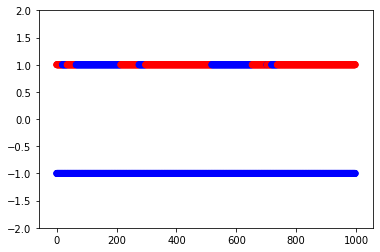

In [154]:
# Example of the grandchild's chromosomes
gc_1 = grandparents_recomb(gp_list)
paint_chroms(gc_1)

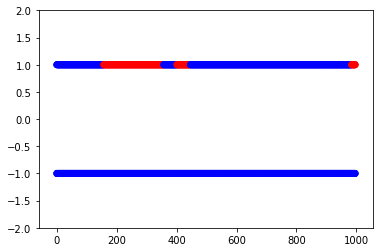

In [155]:
# Example of the great-grandchild's chromosomes
ggc_1 = greatgrandparents_recomb(gp_list_1, gp_list_2)
paint_chroms(ggc_1)

In [156]:
# function that determines whether there are more 1's or 2's. This determines what allele is present
def more(array):
    ones = 0
    twos = 0
    i = len(array) - 1
    while i >= 0:
        if (int(array[i]) == 1):
            ones += 1
        else:
            twos += 1
        i -= 1
    if (ones > twos):
        return 1
    else:
        return 2

In [157]:
# function that determines if the child has blue or brown eyes at one location. 
# The child has brown eyes if at least of the locations is equal to 1
def determination_one_loc(location):
    loc_1 = more(location[0])
    loc_2 = more(location[1])
    if (loc_1 == 1 or loc_2 == 1):
        return 1
    else:
        return 2

In [158]:
# function for one simulation of recombination
def simulation():
    loc1 = greatgrandparents_recomb(side1_loc1, side2_loc1)
    loc2 = greatgrandparents_recomb(side1_loc2, side2_loc2)
    loc3 = greatgrandparents_recomb(side1_loc3, side2_loc3)
    d_1 = determination_one_loc(loc1)
    d_2 = determination_one_loc(loc2)
    d_3 = determination_one_loc(loc3)
    if (d_1 + d_2 + d_3 <= 4):
        return 1
    else:
        return 2

### Recombination Simulation #1

In this simulation, 6/8 of the great-grandparents have brown eyes.

##### Great-grandparent eye colors and locations
- Great-grandparent 1: blue eyed
    - **Location 1:** 22
    - **Location 2:** 22
    - **Location 3:** 22
- Great-grandparent 2: blue eyed
    - **Location 1:** 22
    - **Location 2:** 22
    - **Location 3:** 22
- Great-grandparent 3: brown eyed
    - **Location 1:** 11
    - **Location 2:** 11
    - **Location 3:** 11
- Great-grandparent 4: brown eyed
    - **Location 1:** 11
    - **Location 2:** 11
    - **Location 3:** 11
- Great-grandparent 5: brown eyed
    - **Location 1:** 12
    - **Location 2:** 12
    - **Location 3:** 22
- Great-grandparent 6: brown eyed
    - **Location 1:** 12
    - **Location 2:** 12
    - **Location 3:** 22
- Great-grandparent 7: brown eyed
    - **Location 1:** 11
    - **Location 2:** 12
    - **Location 3:** 22
- Great-grandparent 8: brown eyed
    - **Location 1:** 11
    - **Location 2:** 12
    - **Location 3:** 22

In [159]:
# Creating lists of great grandparents' location values
ggp1_loc1 = ['2'*100, '2'*100]
ggp1_loc2 = ['2'*100, '2'*100]
ggp1_loc3 = ['2'*100, '2'*100]

ggp2_loc1 = ['2'*100, '2'*100]
ggp2_loc2 = ['2'*100, '2'*100]
ggp2_loc3 = ['2'*100, '2'*100]

ggp3_loc1 = ['1'*100, '1'*100]
ggp3_loc2 = ['1'*100, '1'*100]
ggp3_loc3 = ['1'*100, '1'*100]

ggp4_loc1 = ['1'*100, '1'*100]
ggp4_loc2 = ['1'*100, '1'*100]
ggp4_loc3 = ['1'*100, '1'*100]

ggp5_loc1 = ['1'*100, '2'*100]
ggp5_loc2 = ['1'*100, '2'*100]
ggp5_loc3 = ['2'*100, '2'*100]

ggp6_loc1 = ['1'*100, '2'*100]
ggp6_loc2 = ['1'*100, '2'*100]
ggp6_loc3 = ['2'*100, '2'*100]

ggp7_loc1 = ['1'*100, '1'*100]
ggp7_loc2 = ['1'*100, '2'*100]
ggp7_loc3 = ['2'*100, '2'*100]

ggp8_loc1 = ['1'*100, '1'*100]
ggp8_loc2 = ['1'*100, '2'*100]
ggp8_loc3 = ['2'*100, '2'*100]

side1_loc1 = [ggp1_loc1, ggp8_loc1, ggp3_loc1, ggp4_loc1]
side2_loc1 = [ggp2_loc1, ggp7_loc1, ggp5_loc1, ggp6_loc1]
side1_loc2 = [ggp1_loc2, ggp8_loc2, ggp3_loc2, ggp4_loc2]
side2_loc2 = [ggp2_loc2, ggp7_loc2, ggp5_loc2, ggp6_loc2]
side1_loc3 = [ggp1_loc3, ggp8_loc3, ggp3_loc3, ggp4_loc3]
side2_loc3 = [ggp2_loc3, ggp7_loc3, ggp5_loc3, ggp6_loc3]

In [160]:
# running the simulation 500 times

results = make_array()

for i in np.arange(500):
    results = np.append(results, simulation())
    
results

array([2., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2.,
       1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2.,
       2., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 2.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
       1., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1.,
       2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1.,
       2., 2., 2., 1., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1.

In [161]:
# counting the number of 1's and 2's in the results array 
# to determine how many blue and brown-eyed offspring there are

ones = 0
twos = 0

i = len(results) - 1

while i >= 0:
    if (int(results[i]) == 1):
        ones += 1
    else:
        twos += 1
    i -= 1

lst = [ones, twos]
lst

[420, 80]

Text(0, 0.5, 'Number of Times Eye Color is Generated')

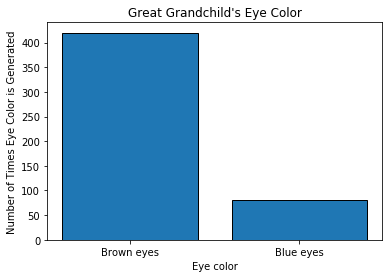

In [162]:
# visualizing the results in a bar chart

labels = ['Brown eyes', 'Blue eyes']
plt.bar(labels, lst)
plt.title("Great Grandchild's Eye Color")
plt.xlabel("Eye color")
plt.ylabel("Number of Times Eye Color is Generated")

### Recombination Simulation #2

In this simulation, 6/8 of the great-grandparents have blue eyes.

##### Great-grandparent eye colors and locations
- Great-grandparent 1: blue eyed
    - **Location 1:** 22
    - **Location 2:** 22
    - **Location 3:** 22
- Great-grandparent 2: blue eyed
    - **Location 1:** 22
    - **Location 2:** 22
    - **Location 3:** 22
- Great-grandparent 3: blue eyed
    - **Location 1:** 22
    - **Location 2:** 22
    - **Location 3:** 22
- Great-grandparent 4: blue eyed
    - **Location 1:** 22
    - **Location 2:** 22
    - **Location 3:** 22
- Great-grandparent 5: blue eyed
    - **Location 1:** 22
    - **Location 2:** 22
    - **Location 3:** 22
- Great-grandparent 6: brown eyed
    - **Location 1:** 11
    - **Location 2:** 11
    - **Location 3:** 11
- Great-grandparent 7: brown eyed
    - **Location 1:** 11
    - **Location 2:** 11
    - **Location 3:** 11
- Great-grandparent 8: brown eyed
    - **Location 1:** 11
    - **Location 2:** 11
    - **Location 3:** 11

In [163]:
# Creating lists of great grandparents' location values
ggp1_loc1 = ['2'*100, '2'*100]
ggp1_loc2 = ['2'*100, '2'*100]
ggp1_loc3 = ['2'*100, '2'*100]

ggp2_loc1 = ['2'*100, '2'*100]
ggp2_loc2 = ['2'*100, '2'*100]
ggp2_loc3 = ['2'*100, '2'*100]

ggp3_loc1 = ['2'*100, '2'*100]
ggp3_loc2 = ['2'*100, '2'*100]
ggp3_loc3 = ['2'*100, '2'*100]

ggp4_loc1 = ['2'*100, '2'*100]
ggp4_loc2 = ['2'*100, '2'*100]
ggp4_loc3 = ['2'*100, '2'*100]

ggp5_loc1 = ['2'*100, '2'*100]
ggp5_loc2 = ['2'*100, '2'*100]
ggp5_loc3 = ['2'*100, '2'*100]

ggp6_loc1 = ['2'*100, '2'*100]
ggp6_loc2 = ['2'*100, '2'*100]
ggp6_loc3 = ['2'*100, '2'*100]

ggp7_loc1 = ['1'*100, '1'*100]
ggp7_loc2 = ['1'*100, '1'*100]
ggp7_loc3 = ['1'*100, '1'*100]

ggp8_loc1 = ['1'*100, '1'*100]
ggp8_loc2 = ['1'*100, '1'*100]
ggp8_loc3 = ['1'*100, '1'*100]

side1_loc1 = [ggp1_loc1, ggp8_loc1, ggp3_loc1, ggp4_loc1]
side2_loc1 = [ggp2_loc1, ggp7_loc1, ggp5_loc1, ggp6_loc1]
side1_loc2 = [ggp1_loc2, ggp8_loc2, ggp3_loc2, ggp4_loc2]
side2_loc2 = [ggp2_loc2, ggp7_loc2, ggp5_loc2, ggp6_loc2]
side1_loc3 = [ggp1_loc3, ggp8_loc3, ggp3_loc3, ggp4_loc3]
side2_loc3 = [ggp2_loc3, ggp7_loc3, ggp5_loc3, ggp6_loc3]

In [164]:
# running the simulation 500 times

results = make_array()

for i in np.arange(500):
    results = np.append(results, simulation())
    
results

array([2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 1., 2., 2.,
       1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2.,
       2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
       1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2.,
       2., 1., 2., 2., 2.

In [165]:
# counting the number of 1's and 2's in the results array 
# to determine how many blue and brown-eyed offspring there are

ones = 0
twos = 0

i = len(results) - 1

while i >= 0:
    if (int(results[i]) == 1):
        ones += 1
    else:
        twos += 1
    i -= 1

lst = [ones, twos]
lst

[94, 406]

Text(0, 0.5, 'Number of Times Eye Color is Generated')

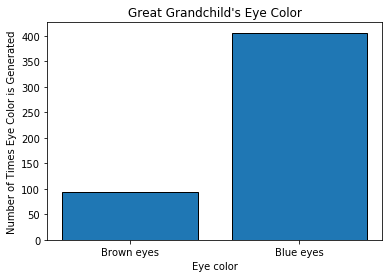

In [166]:
# visualizing the results in a bar chart

labels = ['Brown eyes', 'Blue eyes']
plt.bar(labels, lst)
plt.title("Great Grandchild's Eye Color")
plt.xlabel("Eye color")
plt.ylabel("Number of Times Eye Color is Generated")

### Analysis

Based off of the results from the first recombination simulation, 420/500 of the simulations had a great grandchild that had brown eyes and 80/500 of the simulations had a great grandchild that had blue eyes. These results are expected and do not come as a surprise considering that, in this simulation, there were more great-grandparents with brown eyes. Also, brown alleles are dominant over blue alleles.

Based off of the results from the second recombination simulation, 94/500 of the simulations had a great grandchild that had brown eyes and 406/500 of the simulations had a great grandchild that had blue eyes. These results are expected and do not come as a surprise considering that, in this simulation, there were more great-grandparents with blue eyes. Blue is the recessive allele, but having a large number of individuals who started off with this allele countered this fact. In fact, if one more great-grandparent had brown eyes, the results would flip and there would be a dominant number of offspring with brown eyes. Having two great-grandparents is the minimum number needed to obtain results where blue-eyed offspring are more common than brown-eyed offspring.

These simulations suggests that having brown eyes is more probable than having blue eyes. This can be seen in the real world, where brown eyes are more commonplace overall.